# Introduction

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Plot outliers with LocalOutlierFactor

</font>
</div>

# Outlier detection with Local Outlier Factor (LOF)

<div class="alert alert-block alert-info">
<font color=black>

- The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. 
- It considers as outliers the samples that have a substantially lower density than their neighbors. 

</font>
</div>

# Import modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20

# Create the synthetic dataset

In [7]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

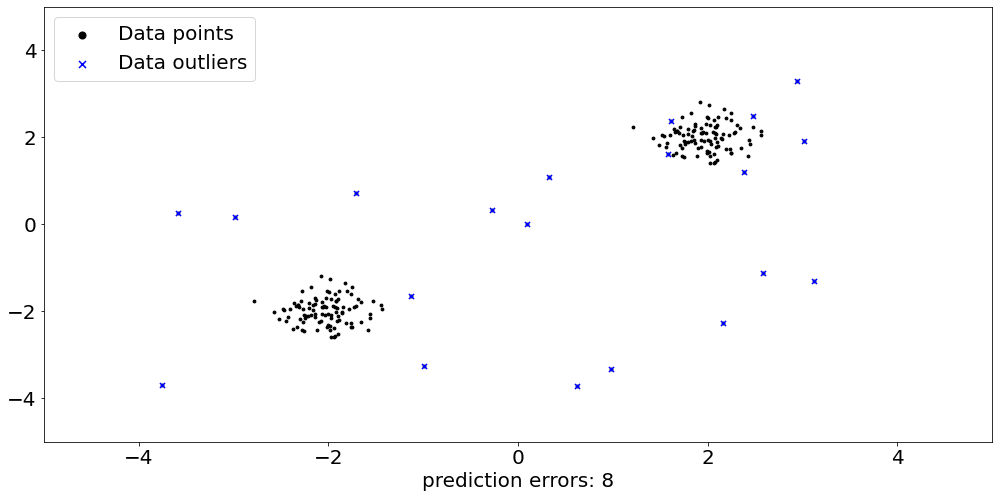

In [46]:
# Plotting original against artificially created outliers
plt.scatter(X[:, 0], X[:, 1], color = 'k', s = 8., label='Data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], marker = "x", color = 'b', s = 26., label = 'Data outliers')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
plt.show()

# Fit the outlier detection model

<div class="alert alert-block alert-info">
<font color=black>

- The number of neighbors considered (parameter n_neighbors) is typically set:
    - 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 
    - 2) smaller than the maximum number of close by samples that can potentially be local outliers.


- **In practice**, such information is generally not available, and taking `n_neighbors=20` appears to work well in general.

</font>
</div>

In [31]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# Plot the results against ground truth

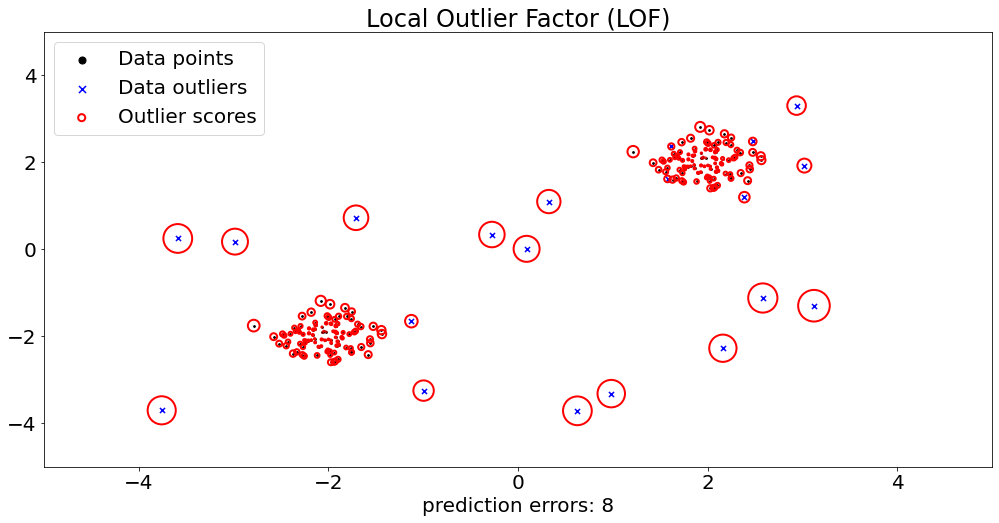

In [48]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label = 'Data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], marker = "x", color = 'b', s = 26., label = 'Data outliers')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', lw = 2, label='Outlier scores')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
plt.show()

# References

<div class="alert alert-block alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py 

</font>
</div>